In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


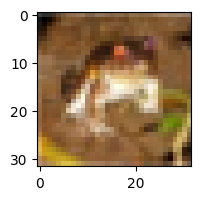

[6]


In [3]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [4]:
# Flattening the y_train to a 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

SHOW RANDOM IMAGES

In [6]:
def show_random_images(x):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[x])
    plt.show() 
    print(classes[y_train[x]]) 

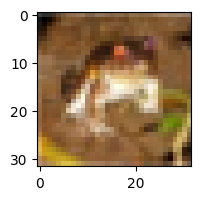

frog


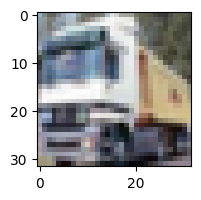

truck


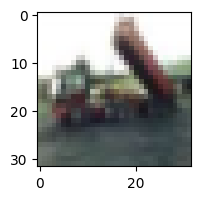

truck


In [7]:
show_random_images(0)
show_random_images(1)
show_random_images(2)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

SCALING

In [9]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

CNN MODEL

In [10]:
model = keras.Sequential([
    # Convolution
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

H = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.5036 - accuracy: 0.4574
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1583 - accuracy: 0.5932
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0239 - accuracy: 0.6438
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9435 - accuracy: 0.6713
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8766 - accuracy: 0.6963
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8216 - accuracy: 0.7147
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7796 - accuracy: 0.7296
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7363 - accuracy: 0.7436
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7005 - accuracy: 0.7550
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.66

EVALUATE MODEL

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9171 - accuracy: 0.6956


[0.9171406030654907, 0.6955999732017517]

In [12]:
y_pred = model.predict(x_test)
y_pred[:5]


313/313 [==============================] - 1s 2ms/step


array([[5.79304993e-04, 1.06090607e-04, 1.59844488e-03, 8.29692304e-01,
        1.53493288e-03, 1.50320828e-01, 1.09804841e-02, 1.61168084e-03,
        1.27119035e-03, 2.30472372e-03],
       [4.55266470e-03, 1.17344297e-01, 8.66952269e-06, 1.18499293e-06,
        5.13728367e-07, 2.66583466e-08, 4.54045832e-08, 1.30812975e-06,
        8.21018755e-01, 5.70725054e-02],
       [5.82335480e-02, 6.34462416e-01, 1.43306947e-03, 7.23869447e-03,
        3.44861578e-03, 4.55925881e-04, 3.09611962e-04, 1.60920934e-03,
        2.61660039e-01, 3.11488584e-02],
       [8.88995409e-01, 1.21457735e-02, 3.15995589e-02, 4.67581907e-03,
        2.51102401e-03, 1.21311285e-04, 1.25495833e-04, 1.87513433e-04,
        5.70933782e-02, 2.54479772e-03],
       [1.38895132e-07, 9.34321815e-06, 3.52458120e-03, 2.50207894e-02,
        3.21681648e-02, 5.72517375e-03, 9.33542252e-01, 4.30232740e-06,
        4.36749679e-06, 8.54239318e-07]], dtype=float32)

In [13]:
np.argmax(y_pred[0])
classes[np.argmax(y_pred[0])]

'cat'

In [14]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

[3, 8, 1, 0, 6]

RANDOM PREDICTIONS

 PREDICTED - frog


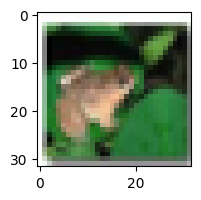

In [15]:
import random
x = random.randint(0,10000)
plt.figure(figsize=(15,2))
plt.imshow(x_test[x])
print(f" PREDICTED - {classes[y_pred[x]]}")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.82      0.80      0.81      1000
           2       0.58      0.57      0.57      1000
           3       0.48      0.57      0.52      1000
           4       0.62      0.66      0.64      1000
           5       0.63      0.58      0.60      1000
           6       0.73      0.79      0.76      1000
           7       0.78      0.71      0.74      1000
           8       0.85      0.76      0.80      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



GRAPHS

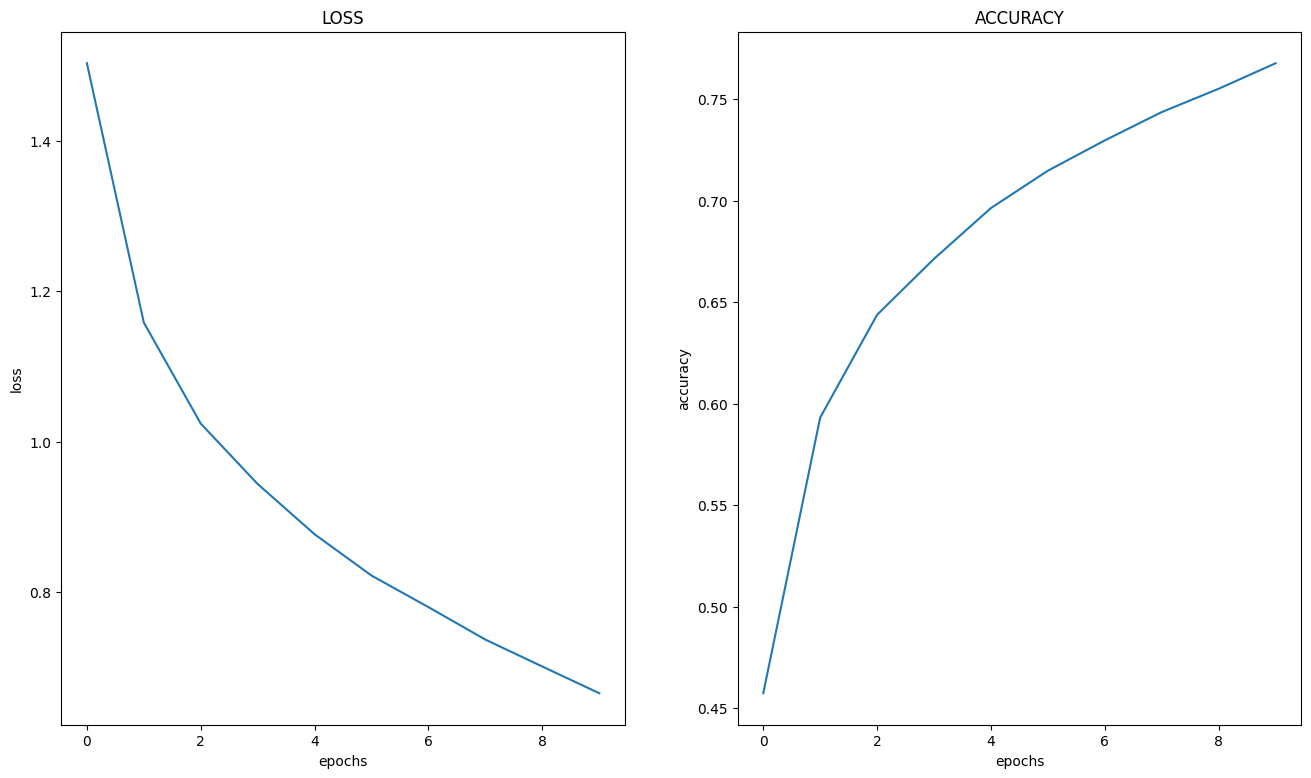

In [17]:
plt.figure(figsize=(16,9))

# Loss graph
plt.subplot(1,2,1)
plt.plot(H.history['loss'], label='train_loss')
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')

# Accuracy graph
plt.subplot(1,2,2)
plt.plot(H.history['accuracy'], label='train_accuracy')
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

Text(0.5, 0, 'epochs')

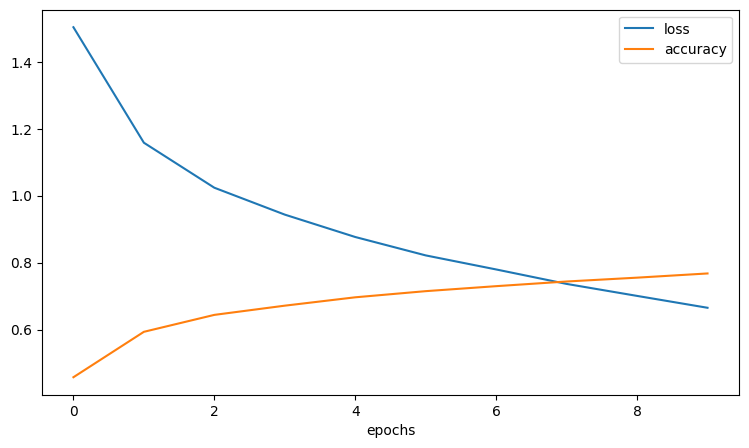

In [21]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.xlabel('epochs')

In [19]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[719,  18,  82,  21,  32,   4,   8,  15,  58,  43],
       [ 28, 803,   9,  12,  11,   6,  18,   2,  19,  92],
       [ 55,   9, 567,  74,  96,  91,  59,  32,   9,   8],
       [ 16,   9,  76, 572,  69, 125,  72,  37,  10,  14],
       [ 15,   2,  70,  89, 663,  34,  68,  49,   8,   2],
       [  7,   4,  54, 229,  43, 582,  32,  42,   3,   4],
       [  5,   5,  51,  73,  37,  19, 791,   6,   9,   4],
       [ 15,   4,  39,  73,  68,  52,  17, 714,   2,  16],
       [ 67,  50,  20,  32,  24,   6,   7,   6, 759,  29],
       [ 34,  74,  11,  24,  18,   9,   9,  15,  20, 786]])>

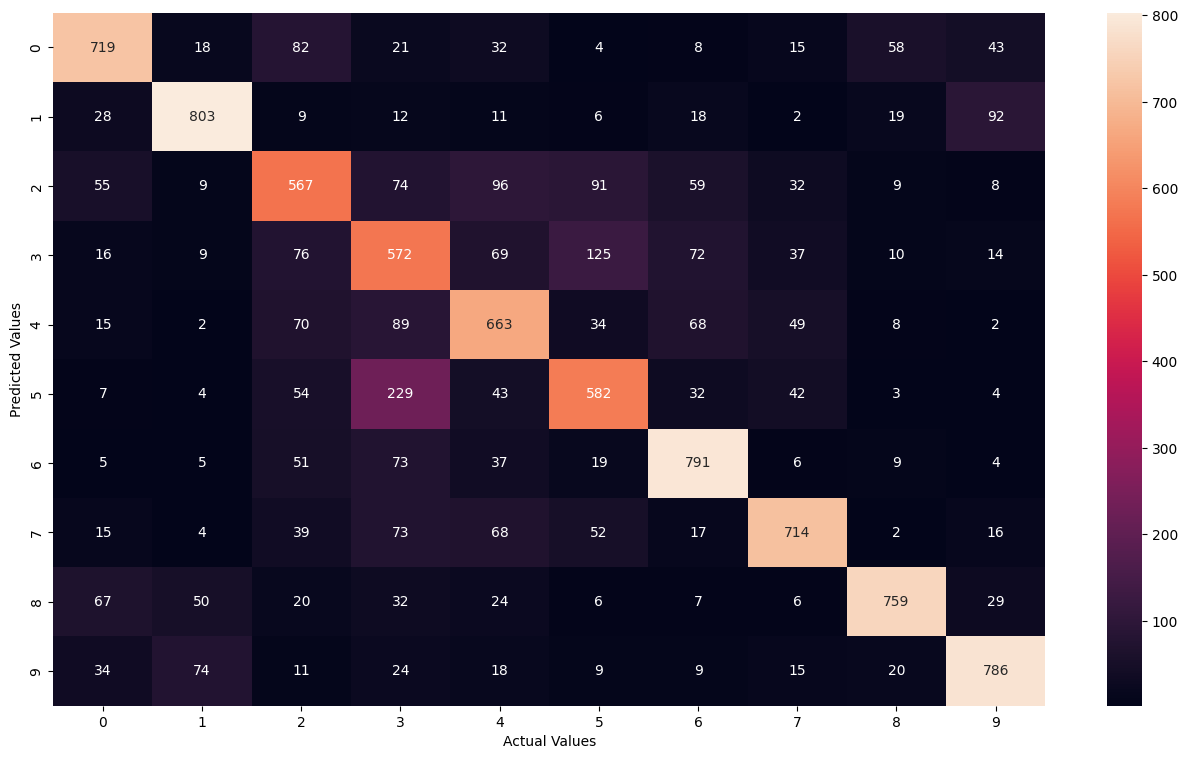

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()